In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# ACÁ EMPIEZA LA CONFIGURACION

In [2]:
# Cada grupo es un pais.
df = pd.DataFrame({
'group': [              '\nARCHITECT','\nTECHNICAL','\nMANAGEMENT'],
'REFACTORING': [                  26.2,        22.4,          17.9],
'IMPROVE TESTING': [              4.9,        6.7,           3.0],
'REPAYMENT ACTIVITIES': [         1.6,        7.5,          4.5],
'ADOPTION OF GOOD PRACTICES': [   8.2,        3.0,           6.0],
'IMPROVE DESIGN': [               8.2,        3.0,          6.0]
#'INACCURATE TIME ESTIMATE': [          7.7, 10.1,  9.4,  3.4],
#'LACK OF A WELL-DEFINED PROCESS': [    7.7,  8.5,  9.4,  3.1]
})

In [3]:
df.head()

,group,REFACTORING,IMPROVE TESTING,REPAYMENT ACTIVITIES,ADOPTION OF GOOD PRACTICES,IMPROVE DESIGN
0,\nARCHITECT,26.2,4.9,1.6,8.2,8.2
1,\nTECHNICAL,22.4,6.7,7.5,3.0,3.0
2,\nMANAGEMENT,17.9,3.0,4.5,6.0,6.0


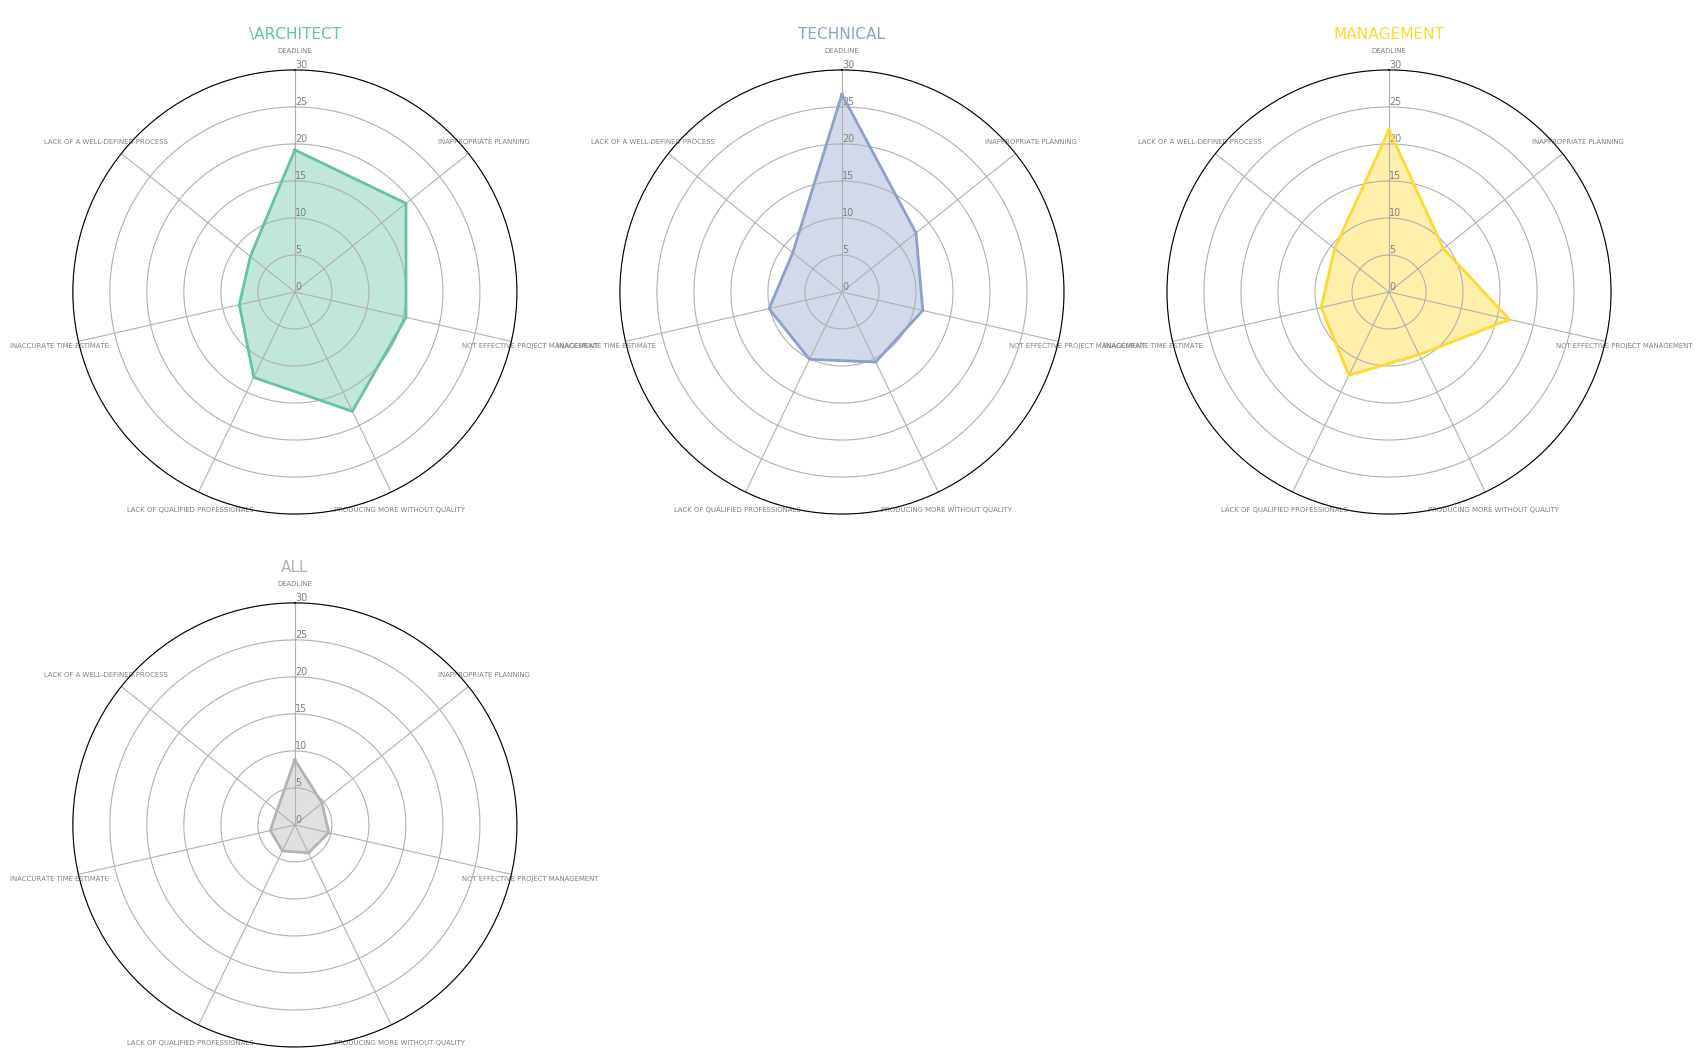

In [4]:
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
  # number of variable
  categories=list(df)[1:]
  N = len(categories)
  
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
  
  # Initialise the spider plot
  ax = plt.subplot(3,3,row+1, polar=True, )
  
  # If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
  
  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories, color='grey', size=5)
  
  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([0,5,10,15,20,25,30], ["0","5","10","15","20","25","30"], color="grey", size=7)
  plt.ylim(0,30)
  
  # Ind1
  values=df.loc[row].drop('group').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
  ax.fill(angles, values, color=color, alpha=0.4)
  
  # Add a title
  plt.title(title, size=11, color=color, y=1)
 
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=100
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
  make_spider( row=row, title=df['group'][row], color=my_palette(row))


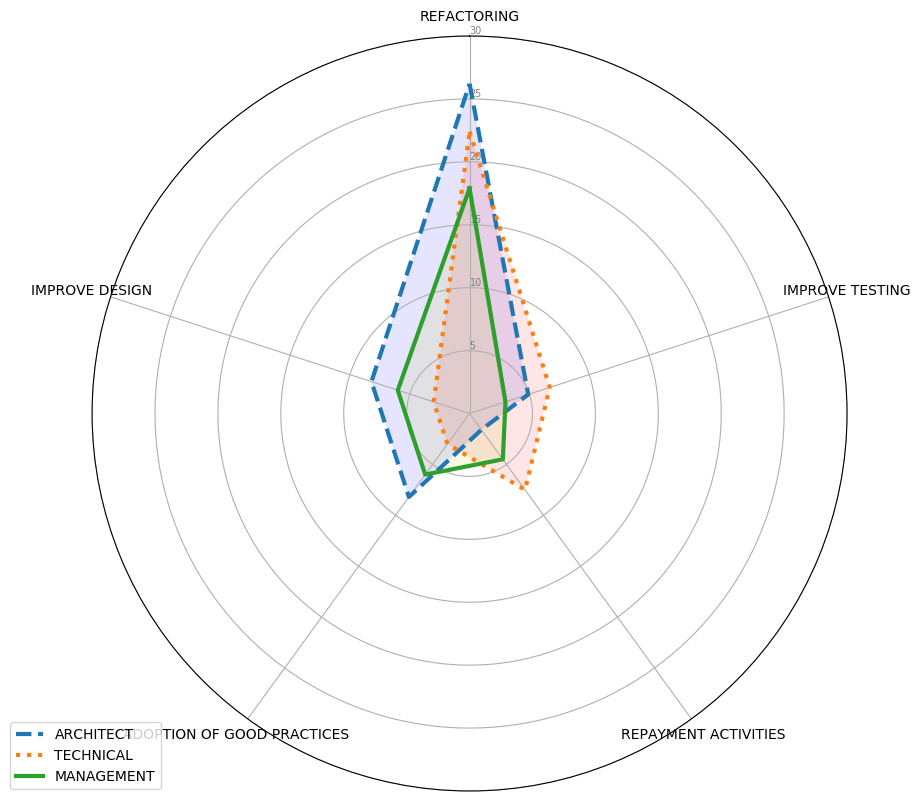

In [4]:
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20,25,30], ["5","10","15","20","25","30"], color="grey", size=7)
plt.ylim(0,30)

 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=3, linestyle='--', label="ARCHITECT")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=3, linestyle=':', label="TECHNICAL")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=3, linestyle='solid', label="MANAGEMENT")
ax.fill(angles, values, 'y', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))